In [1]:
from pyiron_workflow import Workflow
from typing import Optional
from pyironflow import PyironFlow

In [2]:
from pyironflow import PyironFlow
import pyiron_nodes.continuum_fem.geometries as pnf_geom
import pyiron_nodes.continuum_fem.function_spaces as pnf_func
import pyiron_nodes.continuum_fem.mesh_visualization as pnf_viz
import pyiron_nodes.continuum_fem.boundary_conditions as pnf_bc
import pyiron_nodes.continuum_fem.load_definitions as pnf_load
import pyiron_nodes.continuum_fem.solvers as pnf_solve
#import pyiron_nodes.continuum_fem.custom_nodes as pnf_custom
import pyiron_nodes.atomistic.engine as pna_eng
import pyiron_nodes.atomistic.structure as pna_struct
import pyiron_nodes.atomistic.property as pna_prop
import pyiron_nodes.large_scale_atomistic.structure as pnl_struct

In [6]:
wf = Workflow("Test")

wf.CubicBulkCell = pna_struct.build.CubicBulkCell("Ag", 2)
wf.Plot3d = pna_struct.view.Plot3d(wf.CubicBulkCell)
wf.EMT = pna_eng.ase.EMT()
wf.InputElasticTensor = pna_prop.elastic.InputElasticTensor()
wf.ElasticConstants = pna_prop.elastic.ElasticConstants(wf.CubicBulkCell, wf.EMT, wf.InputElasticTensor)
wf.RotateElasticityTensor = pna_prop.elastic.RotateElasticityTensor(wf.ElasticConstants, "fcc", print_tensor=False)

wf.BarParameters = pnf_geom.three_d_geometries.BarParameters()
wf.Bar = pnf_geom.three_d_geometries.Bar(0.0, 0.0, 0.0, 0.1, 0.1, wf.BarParameters)
wf.VectorFunctionSpace = pnf_func.general_function_spaces.VectorFunctionSpace(wf.Bar, "Lagrange", 2)
wf.ScalarDirichlet3D = pnf_bc.scalar_geometric.ScalarDirichlet3D(wf.VectorFunctionSpace, "np.isclose(x[0], 0)", 0.0, 0.0, 0.0)
wf.ScalarDirichlet3D0 = pnf_bc.scalar_geometric.ScalarDirichlet3D(wf.VectorFunctionSpace, "np.isclose(x[0], 3)", 0.0, 0.0, 0.0)
wf.CollectBcs = pnf_bc.scalar_geometric.CollectBcs(wf.ScalarDirichlet3D, wf.ScalarDirichlet3D0)
wf.LinearElasticity3D = pnf_solve.linear_elasticity.LinearElasticity3D(wf.RotateElasticityTensor, wf.Bar, wf.BarParameters, wf.VectorFunctionSpace, wf.CollectBcs, 
                                                                       0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 1.0)

In [7]:
pf = PyironFlow([wf])
pf.gui

In [8]:
wf_gui = pf.get_workflow()
wf_gui.PlotInitMeshObject = pnf_viz.pyvista_viz.PlotInitMeshObject(wf_gui.VectorFunctionSpace)
wf_gui.PlotInitMeshObject.pull()
p1 = wf_gui.PlotInitMeshObject.outputs.plotter.value
p1.show()

/home/tlakshmi/anaconda3/envs/fenicsx_pyironflow_2/lib/python3.12/site-packages/pyvista/plotting/utilities/xvfb.py:48: PyVistaDeprecationWarning: This function is deprecated and will be removed in future version of PyVista. Use vtk-osmesa instead.
  warnings.warn(


Widget(value='<iframe src="http://localhost:36197/index.html?ui=P_0x7316aff7d6a0_0&reconnect=auto" class="pyvi…

In [9]:
wf_gui.PlotVonMises3DObject = pnf_viz.pyvista_viz.PlotVonMises3DObject(wf_gui.Bar, wf_gui.VectorFunctionSpace, wf_gui.LinearElasticity3D, wf_gui.RotateElasticityTensor, 1.0)
wf_gui.PlotVonMises3DObject.pull()
p2 = wf_gui.PlotVonMises3DObject.outputs.plotter.value
p2.show()

/home/tlakshmi/anaconda3/envs/fenicsx_pyironflow_2/lib/python3.12/site-packages/pyvista/plotting/utilities/xvfb.py:48: PyVistaDeprecationWarning: This function is deprecated and will be removed in future version of PyVista. Use vtk-osmesa instead.
  warnings.warn(


Widget(value='<iframe src="http://localhost:36197/index.html?ui=P_0x7316b2777860_2&reconnect=auto" class="pyvi…

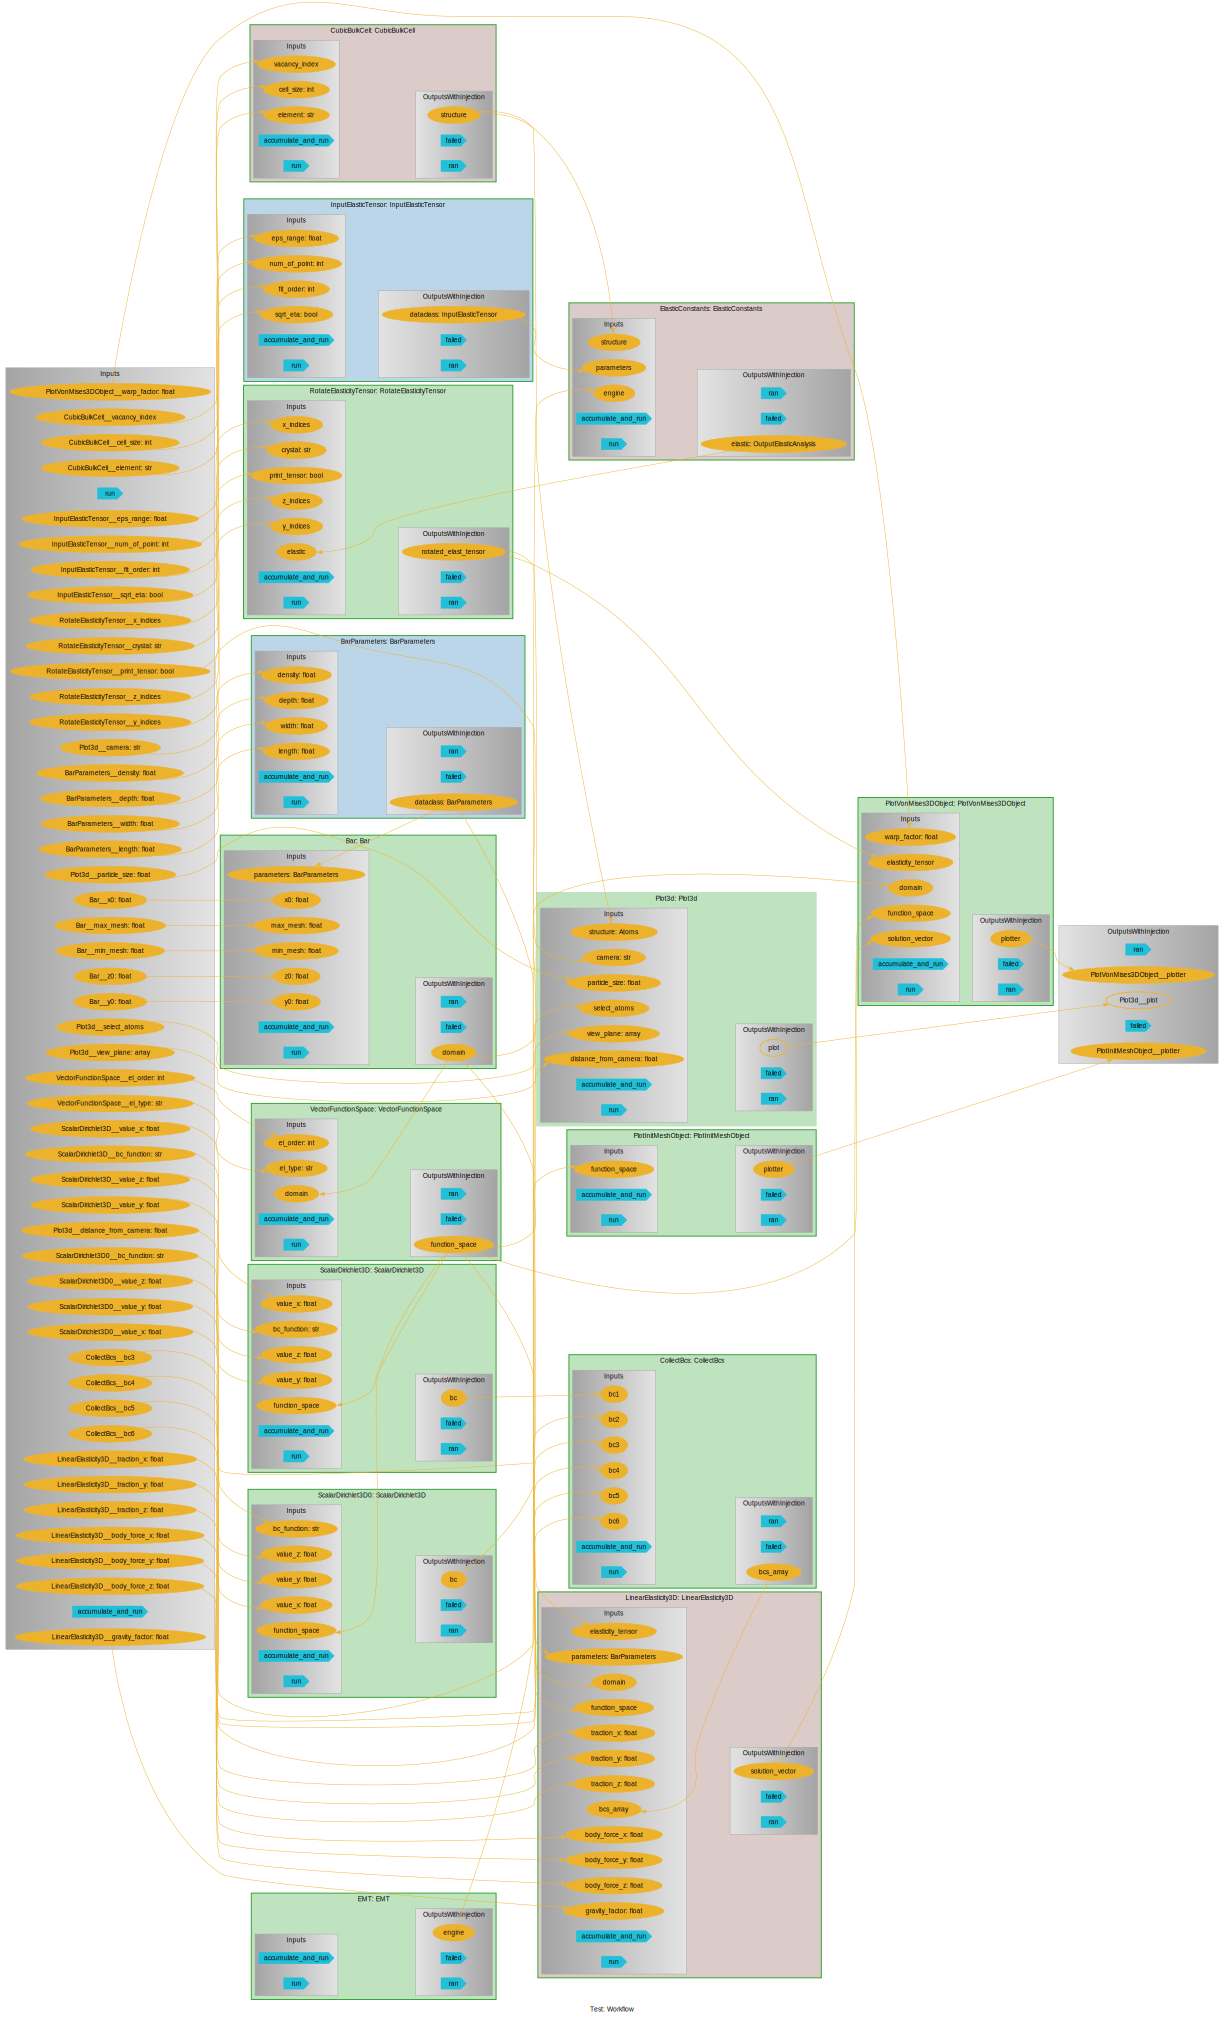

In [13]:
wf_gui.draw(size=(17,30))